In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output
import time

In [2]:
mnist = tf.keras.datasets.mnist
(xtrain, y_train), (xtest, y_test) = mnist.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0

In [3]:
xtrain.shape

(60000, 28, 28)

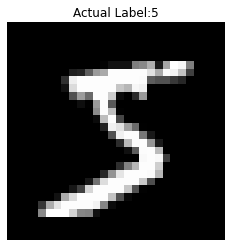

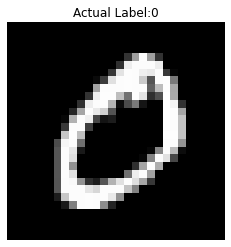

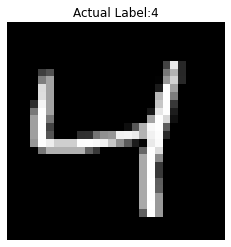

In [4]:
for i in range(3):
    plt.imshow(xtrain[i],cmap='gray')
    plt.title("Actual Label:{}".format(y_train[i]))
    plt.axis('off')
    plt.show()

In [5]:
# reshaping image to 4d of size (60000, 28, 28, 1)  60000 is the no. of training sample
x_train = xtrain.reshape(-1,28,28,1)
x_test = xtest.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [8]:
#  LeNet 5 implementation
def LeNet():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),input_shape = (28,28,1),activation="tanh"))
    model.add(tf.keras.layers.AvgPool2D(strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),activation="tanh"))
    model.add(tf.keras.layers.AvgPool2D(strides=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256,activation="tanh"))
    model.add(tf.keras.layers.Dense(84,activation="tanh"))
    model.add(tf.keras.layers.Dense(10,activation="softmax"))
    model.summary()
    return model
model = LeNet()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [9]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
history = model.fit(x_train, y_train, epochs=10,batch_size=128,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2888 - accuracy: 0.9153 - val_loss: 0.1374 - val_accuracy: 0.9599
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1134 - accuracy: 0.9658 - val_loss: 0.0975 - val_accuracy: 0.9694
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0646 - val_accuracy: 0.9795
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0578 - val_accuracy: 0.9804
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0431 - accuracy: 0.9865 - val_loss: 0.0482 - val_accuracy: 0.9832
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0465 - val_accuracy: 0.9835
Epoch 7/10
60000/60000 [==============================] 

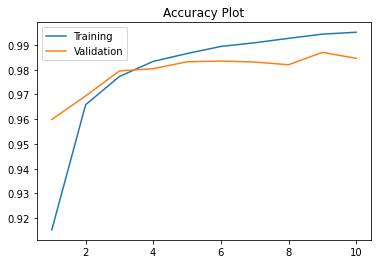

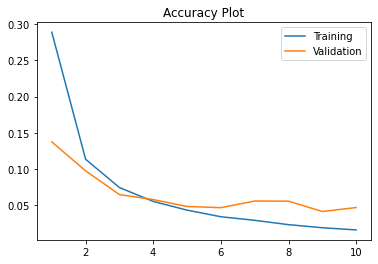

In [11]:
# Plots visualize the models we have trained above 
ep = range(1,len(history.history['accuracy'])+1)
plt.plot(ep, history.history['accuracy'], label = 'Training')
plt.plot(ep, history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Plot')
plt.legend()
plt.show()
ep = range(1,len(history.history['accuracy'])+1)
plt.plot(ep, history.history['loss'], label = 'Training')
plt.plot(ep, history.history['val_loss'], label='Validation')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0467 - accuracy: 0.9846


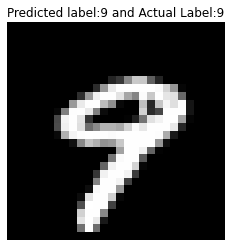

In [13]:
y_pred = np.argmax(model.predict(x_test),axis=1)
for i in range(10):
    plt.imshow(xtest[i],cmap='gray')
    plt.title("Predicted label:{} and Actual Label:{}".format(y_pred[i],np.argmax(y_test[i])))
    plt.axis('off')
    plt.show()
    time.sleep(1.0)
    clear_output(wait=True)

## training accuracy of the network is 99.59% and testing accuracy of the model is coming out to be 98.07% 

Clearly the model performs very well on the dataset and gives perfect accuracy.

# now using same model for fashion_mnist dataset

            0 - T-shirt/top
            1 - Trouser/pants
            2 - Pullover shirt
            3 - Dress
            4 - Coat
            5 - Sandal
            6 - Shirt
            7 - Sneaker
            8 - Bag
            9 - Ankle boot

In [14]:
mnist_fashion = tf.keras.datasets.fashion_mnist
(xtrain, y_train), (xtest, y_test) = mnist_fashion.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0

In [15]:
dic_fashion = {0 : 'T-shirt/top',1 : 'Trouser/pants',2 : 'Pullover shirt',3 : 'Dress',4 : 'Coat',5 : 'Sandal',6 : 'Shirt',
                7 : 'Sneaker',8 : 'Bag',9 : 'Ankle boot'}

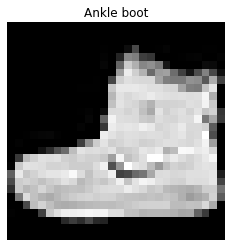

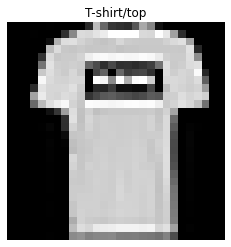

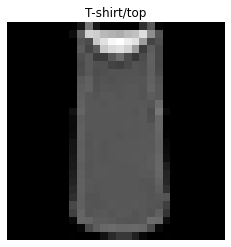

In [16]:
for i in range(3):
    plt.imshow(xtrain[i],cmap='gray')
    plt.title("{}".format(dic_fashion[y_train[i]]))
    plt.axis('off')
    plt.show()

In [17]:
x_train = xtrain.reshape(-1,28,28,1)
x_test = xtest.reshape(-1,28,28,1)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [20]:
model_fashion = LeNet()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [21]:
model_fashion.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
history_fashion = model_fashion.fit(x_train, y_train, epochs=20,batch_size=128,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6340 - accuracy: 0.7654 - val_loss: 0.5026 - val_accuracy: 0.8228
Epoch 2/20
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4470 - accuracy: 0.8374 - val_loss: 0.4343 - val_accuracy: 0.8428
Epoch 3/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3937 - accuracy: 0.8573 - val_loss: 0.4051 - val_accuracy: 0.8546
Epoch 4/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3624 - accuracy: 0.8670 - val_loss: 0.3908 - val_accuracy: 0.8568
Epoch 5/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3388 - accuracy: 0.8771 - val_loss: 0.3678 - val_accuracy: 0.8637
Epoch 6/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3212 - accuracy: 0.8813 - val_loss: 0.3625 - val_accuracy: 0.8681
Epoch 7/20
60000/60000 [==============================] 

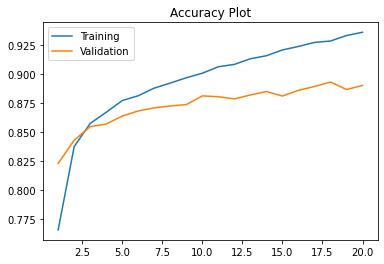

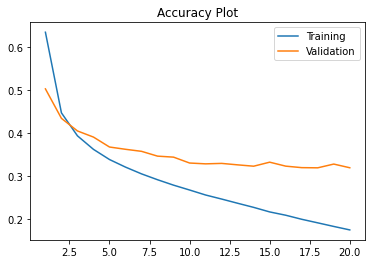

In [23]:
ep = range(1,len(history_fashion.history['accuracy'])+1)
plt.plot(ep, history_fashion.history['accuracy'], label = 'Training')
plt.plot(ep, history_fashion.history['val_accuracy'], label='Validation')
plt.title('Accuracy Plot')
plt.legend()
plt.show()
ep = range(1,len(history_fashion.history['accuracy'])+1)
plt.plot(ep, history_fashion.history['loss'], label = 'Training')
plt.plot(ep, history_fashion.history['val_loss'], label='Validation')
plt.title('Accuracy Plot')
plt.legend()
plt.show()

In [24]:
loss, accuracy = model_fashion.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.3197 - accuracy: 0.8901


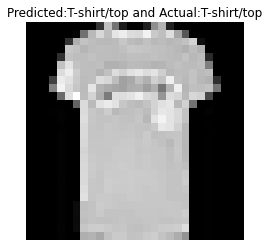

In [25]:
y_pred = np.argmax(model_fashion.predict(x_test),axis=1)
for i in range(10,20):
    plt.imshow(xtest[i],cmap='gray')
    plt.title("Predicted:{} and Actual:{}".format(dic_fashion[y_pred[i]],dic_fashion[np.argmax(y_test[i])]))
    plt.axis('off')
    plt.show()
    time.sleep(2.0)
    clear_output(wait=True)

## training accuracy of the network is 93.43% and testing accuracy of the model is coming out to be 89.01% 

Clearly performing descent and is overfitting a little performance can be improved by using data augmentation.